In [2]:
#import some libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
#import data
dataset = pd.read_csv('acuna_test.csv')

In [4]:
dataset.head()

,Unnamed: 0,Player ID,First Name,Last Name,Year,AB,H,HR,RBI,SO,POS,Adjusted Salary,BA
0,25633,troutmi01,Mike,Trout,2013,589,190,27,97.0,136.0,OF,525434,0.323
1,25634,troutmi01,Mike,Trout,2014,602,173,36,111.0,184.0,OF,1013817,0.287
2,25635,troutmi01,Mike,Trout,2015,575,172,41,90.0,158.0,OF,6159738,0.299
3,25636,troutmi01,Mike,Trout,2016,549,173,29,100.0,137.0,OF,16083333,0.310
4,25750,uptonju01,Justin,Upton,2009,526,158,26,86.0,137.0,OF,460913,0.300


In [5]:
#manually entered acuña's stats, collected from baseball reference.com 

acuna = {"First Name": ["Ronald", "Ronald"], "Last Name": ["Acuna", "Acuna"], "Year": [2018,2019], "AB": [433,626], "H": [127,175], "HR": [26,41], "RBI": [64, 101], "SO":[123,188], "BA": [.293,.280], "Adjusted Salary": [545000, 560000]}
acuna_df = pd.DataFrame(acuna)
acuna_df

,First Name,Last Name,Year,AB,H,HR,RBI,SO,BA,Adjusted Salary
0,Ronald,Acuna,2018,433,127,26,64,123,0.293,545000
1,Ronald,Acuna,2019,626,175,41,101,188,0.280,560000


In [6]:
X = dataset[["H", "HR", "RBI", "BA", "SO"]]  #add pos
y = dataset["Adjusted Salary"].values.reshape(-1, 1)
X_test = acuna_df[["H", "HR", "RBI", "BA", "SO"]]
y_test = acuna_df["Adjusted Salary"].values.reshape(-1, 1)


print(X.shape, y.shape)
X_test.shape, y_test.shape

(125, 5) (125, 1)


((2, 5), (2, 1))

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)


X_train_scaled = X_scaler.transform(X)
y_train_scaled = y_scaler.transform(y)


X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  #

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
print(training_score)
#testing_score = model.score(X_test, y_test)



0.18872580578117382


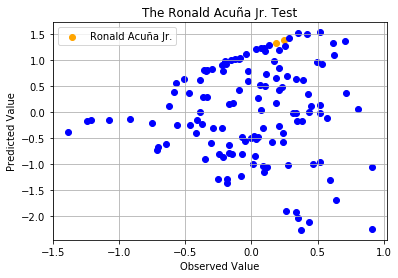

In [10]:
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)
plt.scatter(predictions, predictions - y_test_scaled, c="orange", label="Ronald Acuña Jr.")

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue")
plt.legend()
plt.ylabel("Predicted Value")
plt.xlabel("Observed Value")
plt.grid(True)

plt.savefig("Output_Plots/acuna_Residual_Plot.png")
plt.title("The Ronald Acuña Jr. Test")
plt.show()


In [11]:
acuna_prediction = y_scaler.inverse_transform(predictions)
acuna_prediction

array([[11576970.08834606],
       [12085395.36290416]])